**Desicion Tree**

**1. Data Preparation:**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [4]:
df=pd.read_excel('/content/heart_disease.xlsx',sheet_name='Heart_disease')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [5]:
print(df.shape)
print(df.columns)
print(df.info())

(908, 13)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None


In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [7]:
median=df['oldpeak'].median()

In [8]:
df.fillna(median,inplace=True)

In [9]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [10]:
df.duplicated().sum()

np.int64(1)

In [11]:
df.drop_duplicates(inplace=True)

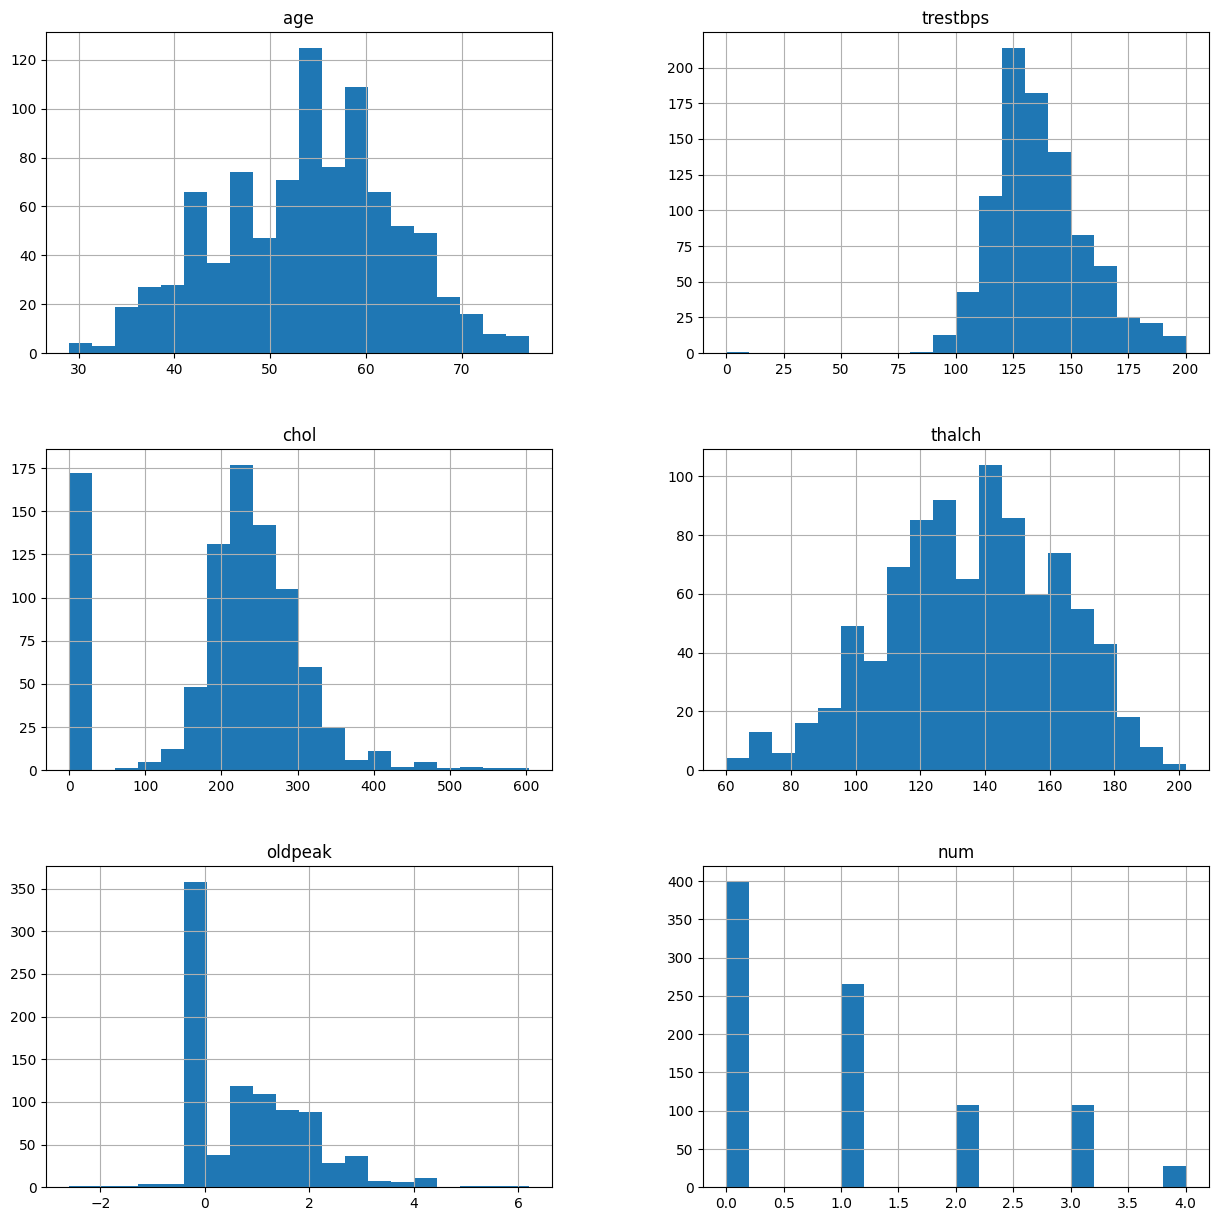

In [12]:
df.hist(bins=20,figsize=(15,15))
plt.show()

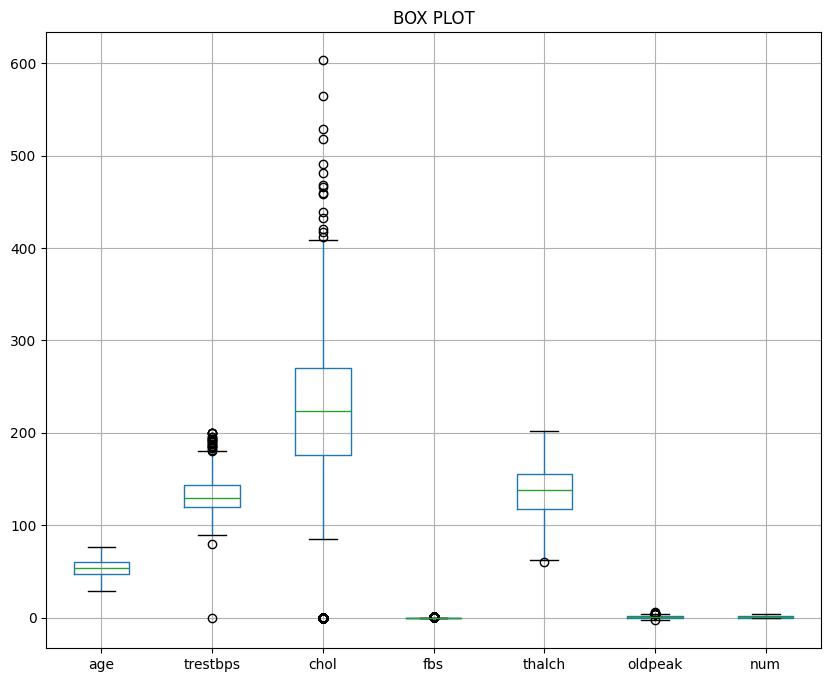

In [19]:
plt.figure(figsize=(10,8))
df.boxplot()
plt.title('BOX PLOT')
plt.show()

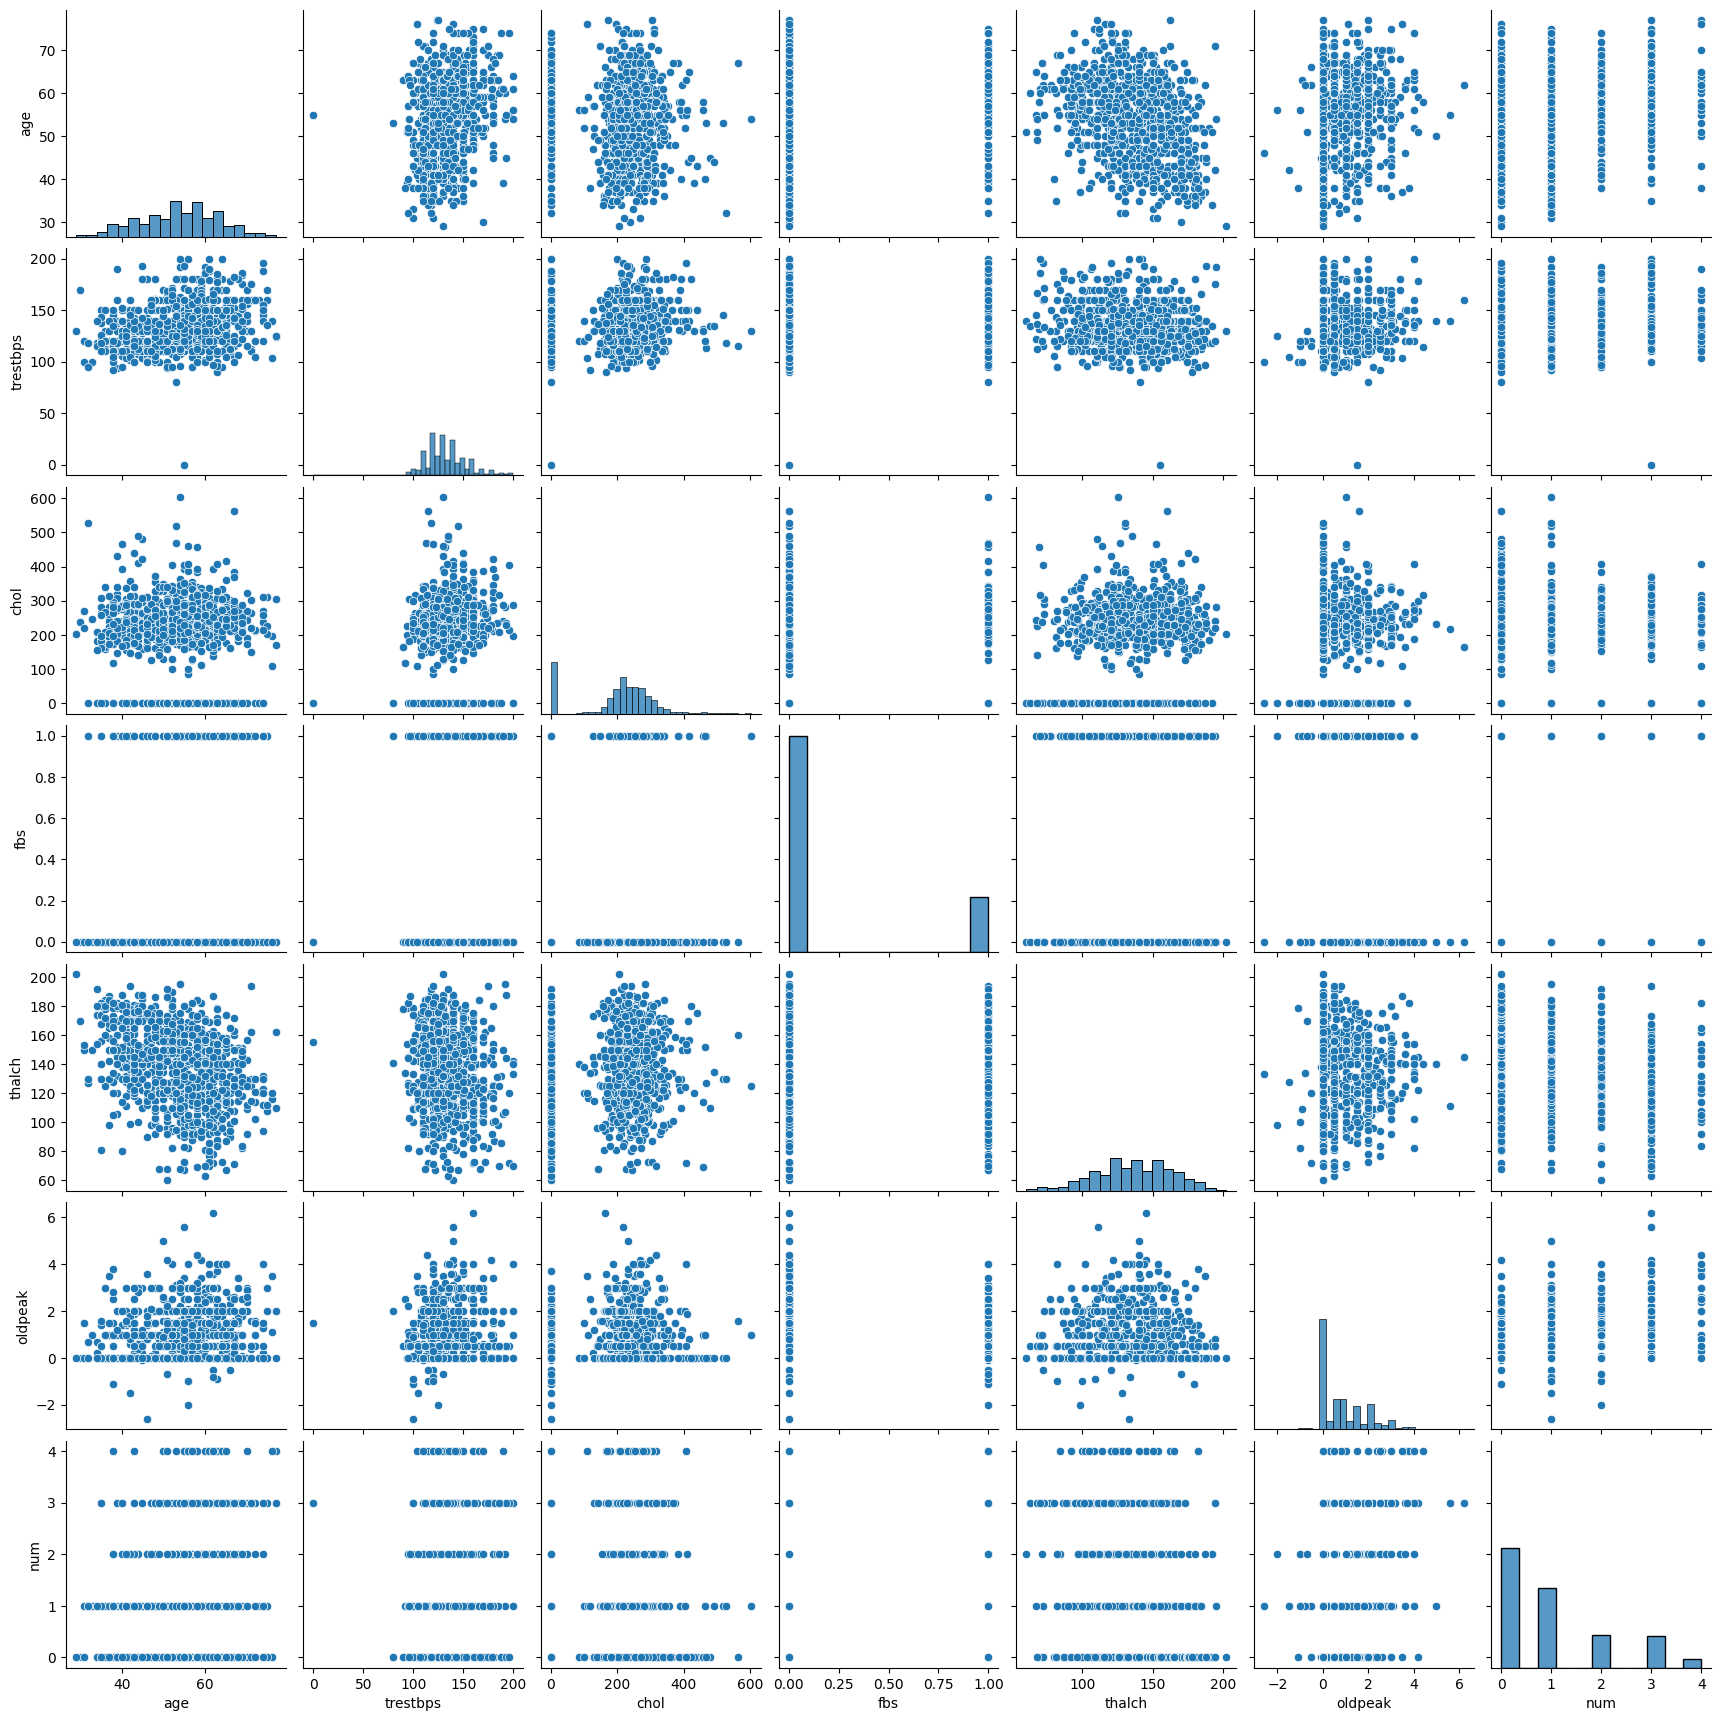

In [14]:
sns.pairplot(df)
plt.show()

**3. Feature Engineering:**

In [22]:
df['fbs']=df['fbs'].astype('int')

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,1,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,0,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,0,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,0,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,0,normal,126,True,1.5,flat,fixed defect,0


In [24]:
df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,int64
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [29]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].astype(str)

In [30]:
df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,int64
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,1,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,0,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,0,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,0,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,0,normal,126,True,1.5,flat,fixed defect,0


In [34]:
categorical_val=df.select_dtypes(include='object').columns
label=LabelEncoder()
for col in categorical_val:
    df[col]=label.fit_transform(df[col])

In [35]:
df.rename(columns={'num':'target'},inplace=True)

In [36]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0


In [37]:
corr=df.corr()

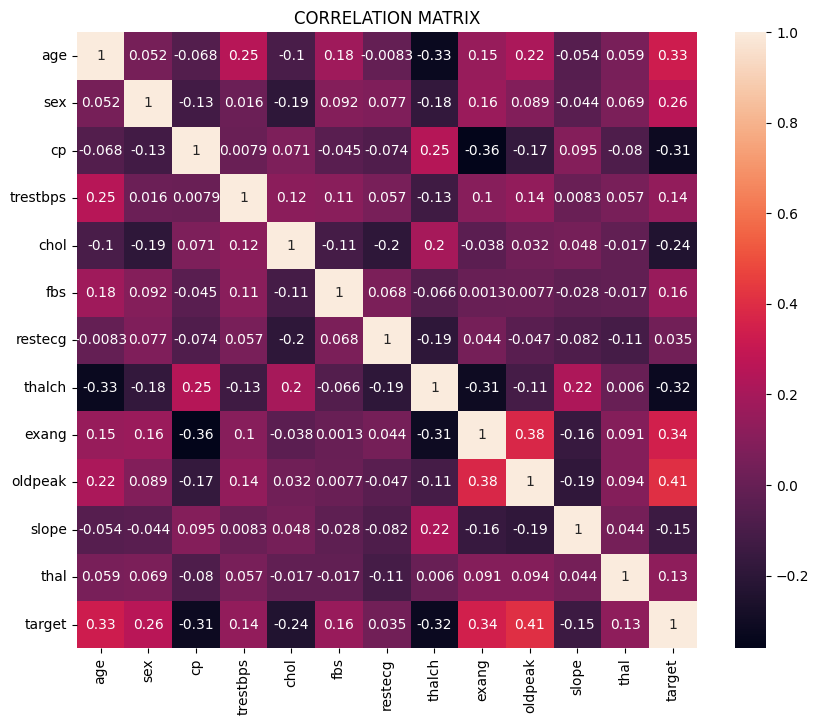

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)
plt.title('CORRELATION MATRIX')
plt.show()

**4. Decision Tree Classification:**

In [45]:
features=df.drop('target',axis=1)
target=df['target']

In [46]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=100)

In [47]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(725, 12)
(182, 12)
(725,)
(182,)


In [48]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [49]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [51]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 2,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 1,
       2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 2, 2])

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        85
           1       0.39      0.73      0.51        49
           2       0.21      0.14      0.17        22
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00         4

    accuracy                           0.55       182
   macro avg       0.28      0.32      0.29       182
weighted avg       0.51      0.55      0.51       182



**5. Hyperparameter Tuning:**

In [56]:
params={
    'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7],'splitter':['random','best']
}

In [57]:
grid=GridSearchCV(model,params)

In [58]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'splitter': ['random', 'best']})

In [59]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'}

In [61]:
y_pred1=model.predict(x_test)

In [62]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        85
           1       0.39      0.73      0.51        49
           2       0.21      0.14      0.17        22
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00         4

    accuracy                           0.55       182
   macro avg       0.28      0.32      0.29       182
weighted avg       0.51      0.55      0.51       182



**Task-6. Model Evaluation and Analysis:**

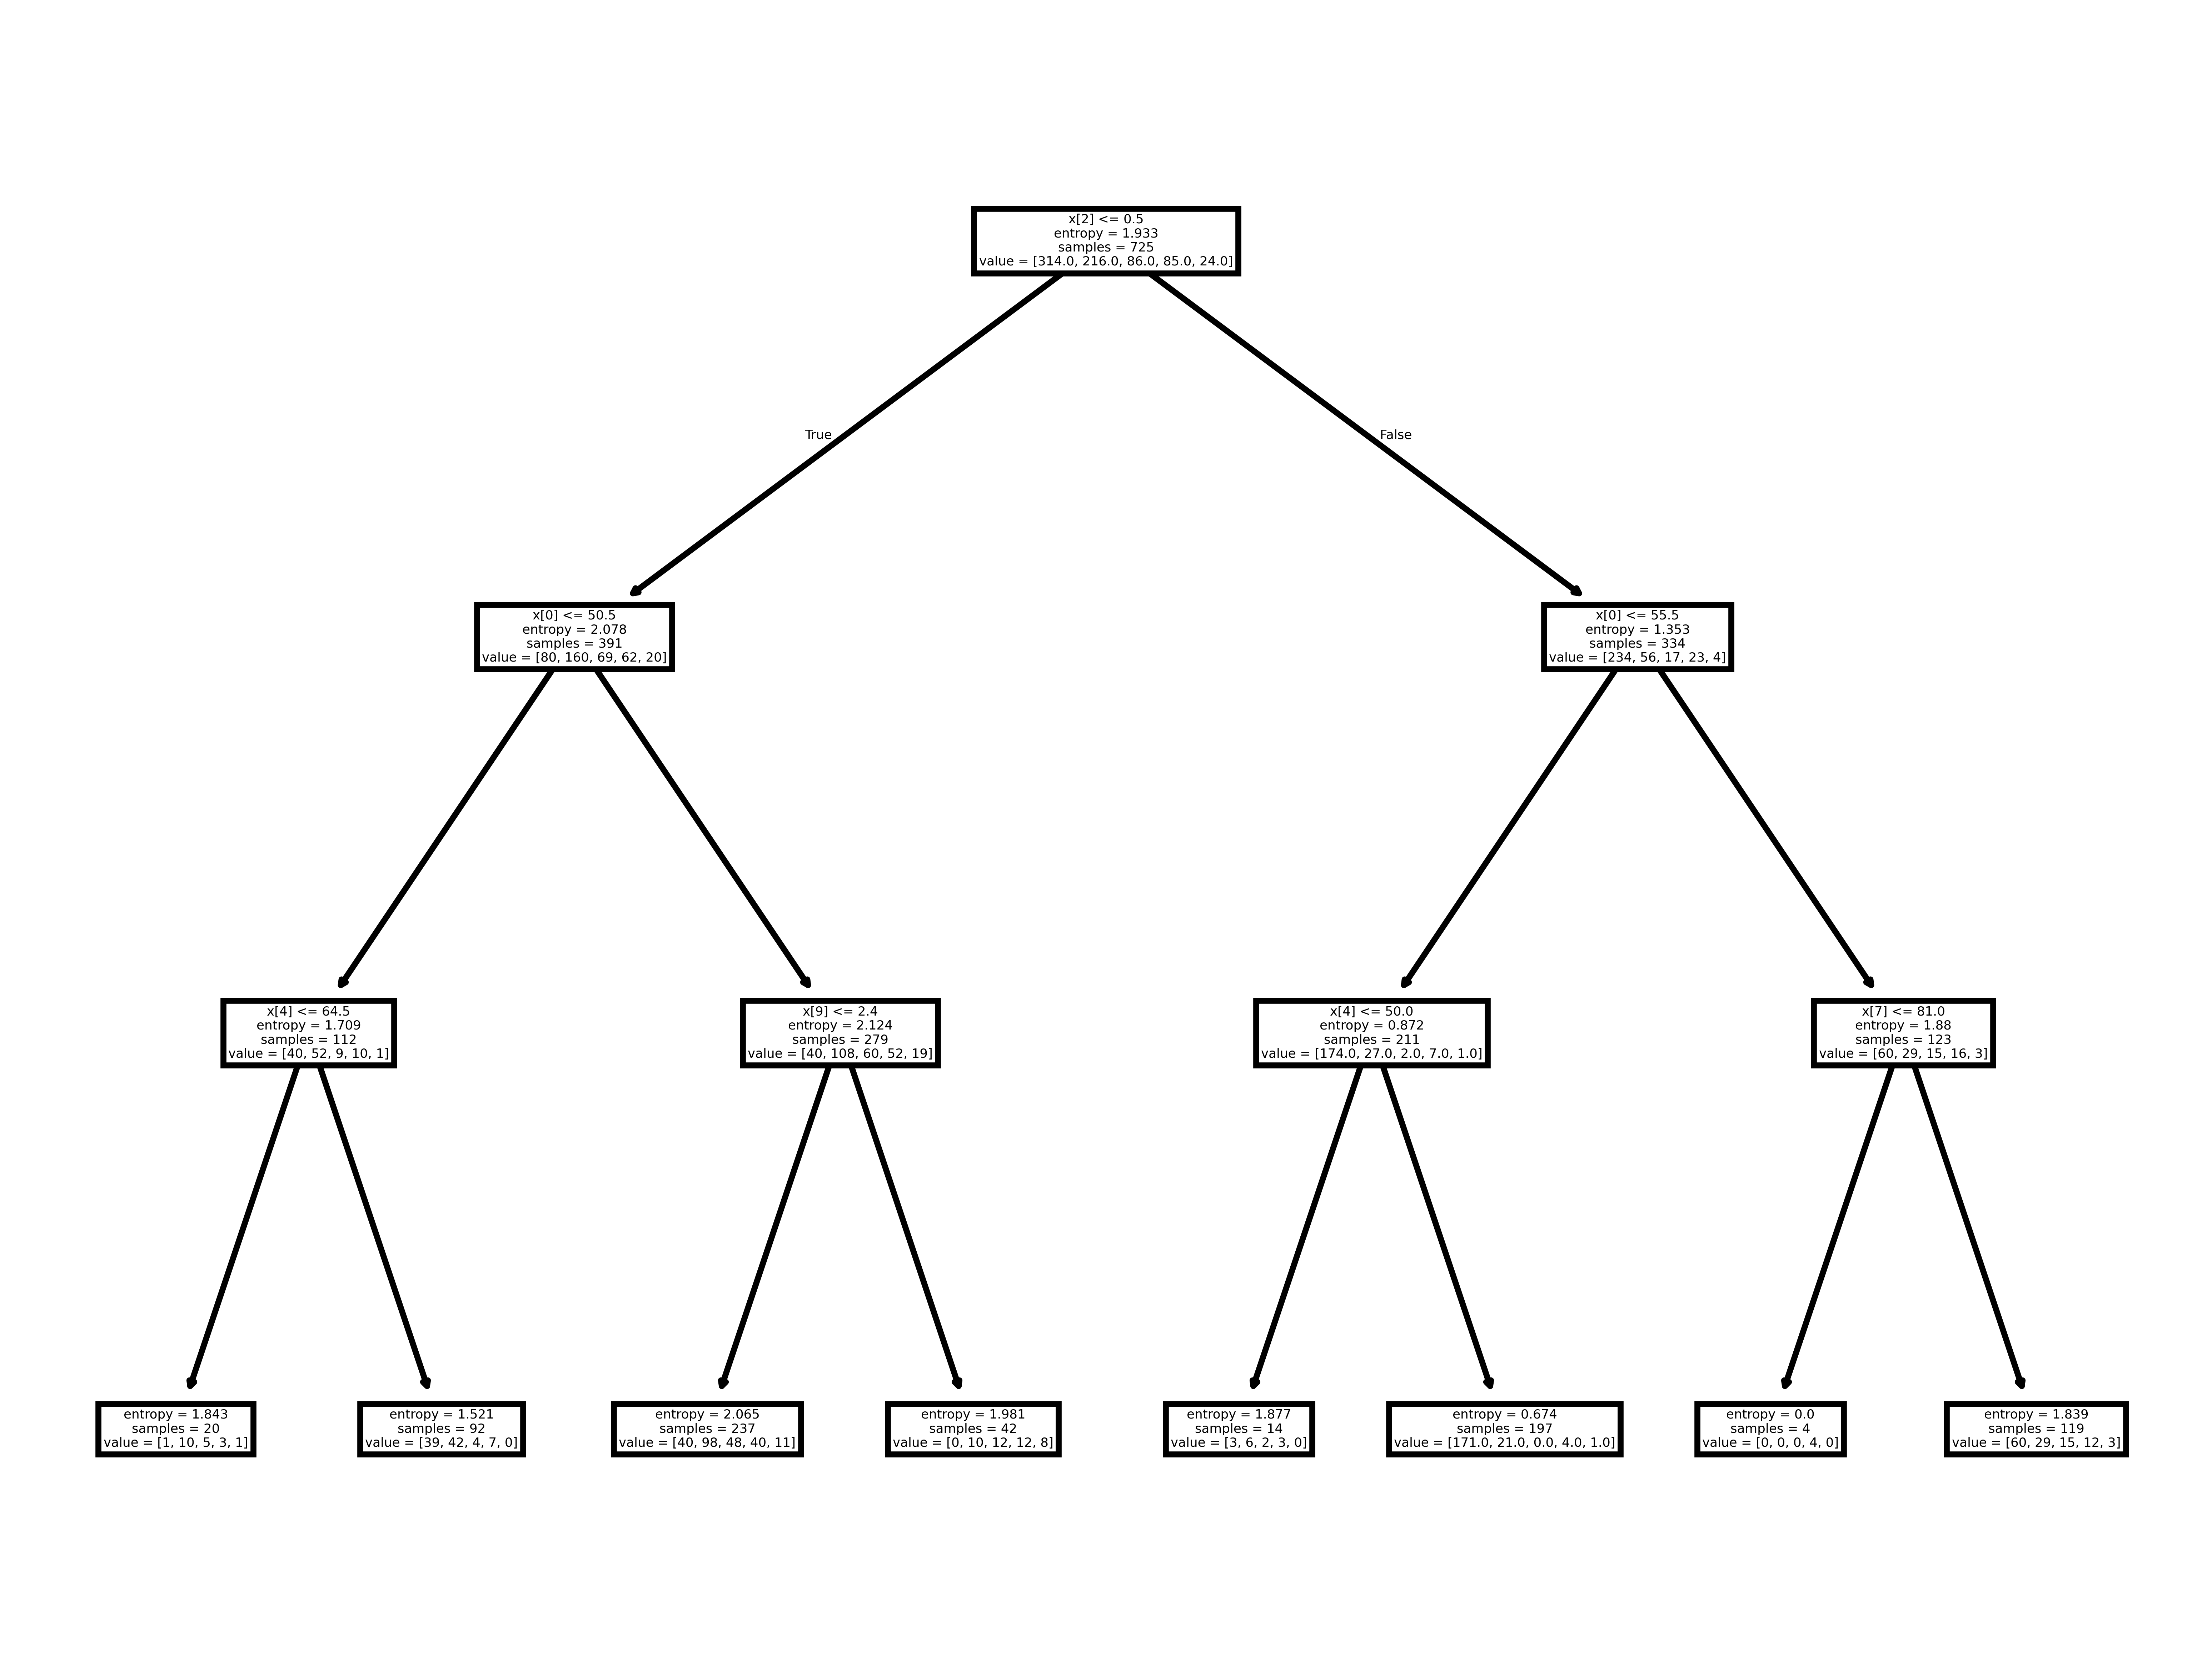

In [63]:
plt.figure(dpi=1200)
tree.plot_tree(model)
plt.show()

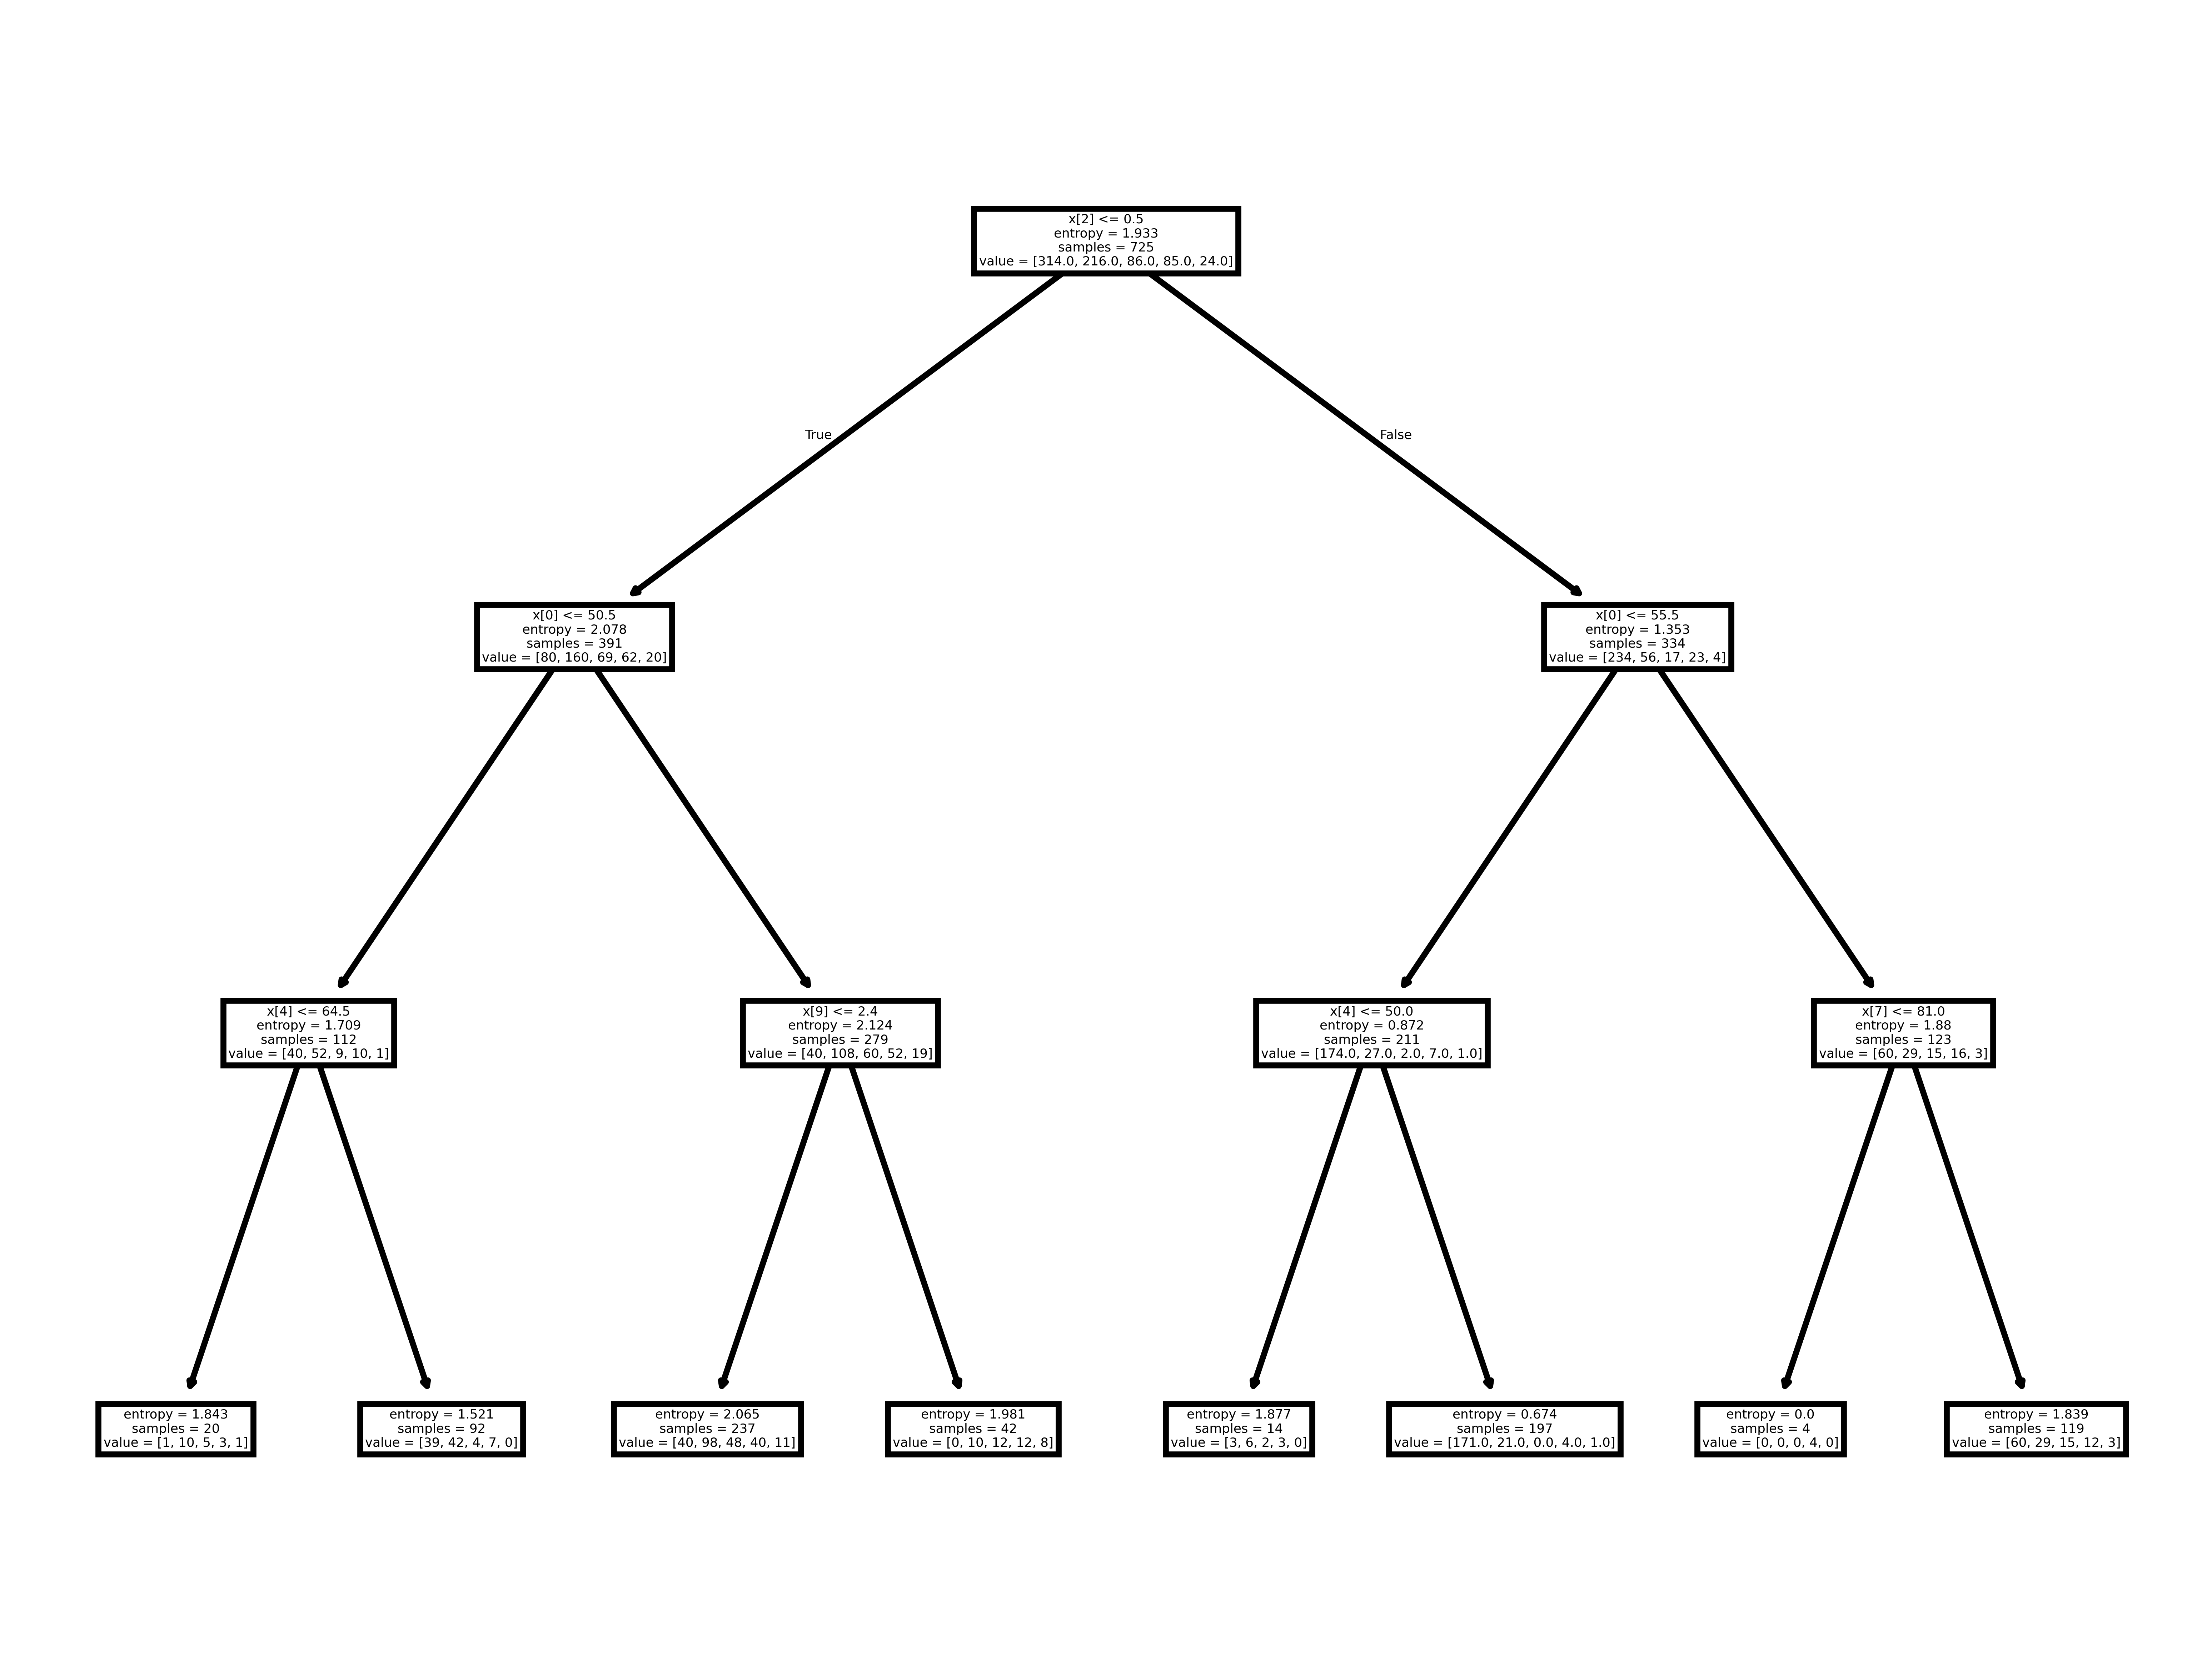

In [65]:
plt.figure(dpi=1200)
tree.plot_tree(model)
plt.show()

Interview Questions:

1. Common Decision Tree Hyperparameters:

max_depth: Limits tree depth; prevents overfitting by restricting complexity. min_samples_split: Minimum samples to split a node; higher values prevent small splits, reducing overfitting. min_samples_leaf: Minimum samples per leaf; larger leaves reduce overfitting. criterion: Split quality metric (e.g., gini, entropy); affects purity of nodes. max_features: Limits features considered per split; helps prevent overfitting and speeds up training.

2. Label Encoding vs. One-Hot Encoding:

Label Encoding: Assigns each category a unique integer. Best for ordinal data with an inherent order. One-Hot Encoding: Creates binary columns for each category, suited for nominal (unordered) data.